In [2]:
%pylab inline
from glob import glob
import sys
import pandas as pd
from pathlib import Path

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Document-level evaluation
Here we only consider the SPP-ext-v1 dataset

In [46]:
document_eval = pd.read_csv('docEvaluation2023-10-09_09-03-58.csv').drop(columns=['Unnamed: 0'])

In [16]:
document_eval.sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)[["alignment","desc","matching","max_queuesize","min_area","min_keypoints","rank_top_k","same_class","global_quality","grouping_quality","relationship_quality"]].head(10)

,alignment,desc,matching,max_queuesize,min_area,min_keypoints,rank_top_k,same_class,global_quality,grouping_quality,relationship_quality
56,CV_MAGSAC,vlfeat_sift_heq,BF,500,0.01,20,400,True,1.0,1.0,0.835700
10,CV_MAGSAC,vlfeat_sift_heq,BF,300,0.01,20,400,True,1.0,1.0,0.835205
43,CV_MAGSAC,vlfeat_sift_heq,BF,300,0.01,10,400,True,1.0,1.0,0.835205
15,CV_MAGSAC,vlfeat_sift_heq,BF,300,0.05,10,400,True,1.0,1.0,0.833530
59,CV_MAGSAC,vlfeat_sift_heq,BF,300,0.05,20,400,True,1.0,1.0,0.833530
2,CV_MAGSAC,vlfeat_sift_heq,BF,300,0.01,10,200,True,1.0,1.0,0.830242
49,CV_MAGSAC,vlfeat_sift_heq,BF,300,0.01,20,200,True,1.0,1.0,0.830242
1,CV_MAGSAC,vlfeat_sift_heq,BF,1000,0.05,5,200,True,1.0,1.0,0.829045
61,CV_MAGSAC,vlfeat_sift_heq,BF,500,0.05,5,200,True,1.0,1.0,0.829045
11,CV_MAGSAC,vlfeat_sift_heq,BF,500,0.05,10,200,True,1.0,1.0,0.828726


In [19]:
eval = document_eval[(document_eval["alignment"] == "CV_MAGSAC") & (document_eval["desc"] == "vlfeat_sift_heq") & (document_eval["matching"] == "BF")]

In [17]:
document_eval[document_eval["max_queuesize"] == 300]

,relationship_precision,relationship_recall,relationship_quality,grouping_precision,grouping_recall,grouping_quality,global_precision,global_recall,global_quality,desc,matching,alignment,rank_top_k,min_keypoints,max_queuesize,min_area,same_class
0,0.963625,0.649264,0.775809,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,40,10,300,0.01,True
2,0.965734,0.728092,0.830242,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,200,10,300,0.01,True
6,0.987991,0.558809,0.713859,1.0,0.967215,0.983334,1.0,0.983471,0.991667,vlfeat_sift_heq,BF,CV_MAGSAC,400,50,300,0.01,True
7,0.962901,0.635248,0.765486,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,40,20,300,0.10,True
10,0.964318,0.736583,0.835205,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,400,20,300,0.01,True
13,0.964563,0.692003,0.805861,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,100,20,300,0.05,True
15,0.964292,0.733997,0.833530,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,400,10,300,0.05,True
18,0.965103,0.709908,0.818065,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,200,20,300,0.10,True
21,0.963624,0.718554,0.823237,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,400,20,300,0.10,True
25,0.963956,0.676788,0.795242,1.0,1.000000,1.000000,1.0,1.000000,1.000000,vlfeat_sift_heq,BF,CV_MAGSAC,100,10,300,0.10,True


In [26]:
eval[(document_eval["min_area"] == 0.01) &
     (document_eval["max_queuesize"] == 300) & 
     (document_eval["min_keypoints"] == 20) &
     (document_eval["rank_top_k"] == 400)]

,relationship_precision,relationship_recall,relationship_quality,grouping_precision,grouping_recall,grouping_quality,global_precision,global_recall,global_quality,desc,matching,alignment,rank_top_k,min_keypoints,max_queuesize,min_area,same_class
10,0.964318,0.736583,0.835205,1.0,1.0,1.0,1.0,1.0,1.0,vlfeat_sift_heq,BF,CV_MAGSAC,400,20,300,0.01,True


In [47]:
panel_eval =  pd.read_csv('panelEvaluation2023-10-09_09-11-24.csv').drop(columns=['Unnamed: 0'])

In [30]:
panel_eval[(["min_area"] == 0.01) &
      (panel_eval["max_queuesize"] == 300) & 
      (panel_eval["min_keypoints"] == 20) &
      (panel_eval["rank_top_k"] == 400)]

,relationship_precision,relationship_recall,relationship_quality,grouping_precision,grouping_recall,grouping_quality,global_precision,global_recall,global_quality,desc,matching,alignment,rank_top_k,min_keypoints,max_queuesize,min_area,same_class
10,0.881217,0.64008,0.741538,0.89447,0.786547,0.837044,0.924138,0.822086,0.87013,vlfeat_sift_heq,BF,CV_MAGSAC,400,20,300,0.01,True


In [99]:
# Print plot of panel and document eval fixing the max_queuesize, min_area and min_keypoints, but varying the rank_top_k
def plot(ax, results, x, max_queuesize=None, min_area=None, min_keypoints=None, rank_top_k=None):
    if max_queuesize is not None:
        results = results[results["max_queuesize"] == max_queuesize]
    if min_area is not None:
        results = results[results["min_area"] == min_area]
    if min_keypoints is not None:
        results = results[results["min_keypoints"] == min_keypoints]
    if rank_top_k is not None:
        results = results[results["rank_top_k"] == rank_top_k]

    # results = results.rename(columns={"global_quality": "Content Classification", "grouping_quality": "Content Grouping", "relationship_quality": "Content Pairing"})
    results = results.rename(columns={"global_precision": "Content Classification Precision", "grouping_precision": "Content Grouping Precision", "relationship_precision": "Content Pairing Precision"})
    # results = results.rename(columns={"global_recall": "Content Classification Recall", "grouping_recall": "Content Grouping Recall", "relationship_recall": "Content Pairing Recall"})
    results = results.sort_values(by=[x])
    # results.plot.scatter(x=x, y=["Content Classification"], figsize=(10,5), ax=ax)
    results.plot(x=x, y=["Content Classification Precision"], figsize=(10,5), ax=ax, linestyle='-', marker='o', markersize=4)
    results.plot(x=x, y=["Content Grouping Precision"], figsize=(10,5), ax=ax, linestyle='-', marker='x', markersize=4)
    results.plot(x=x, y=["Content Pairing Precision"], figsize=(10,5), ax=ax, linestyle='-', marker='v', markersize=4)

Text(0.5, 1.0, 'Document Evaluation')

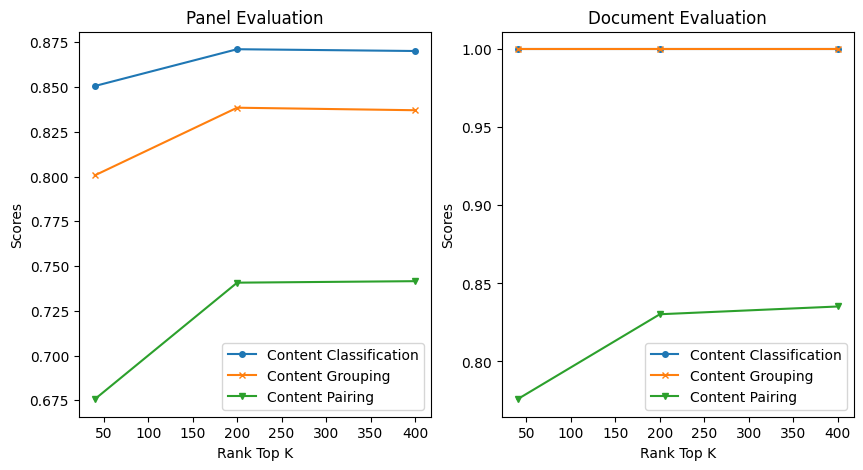

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plot(ax[0], panel_eval, x='rank_top_k', max_queuesize=300, min_area=0.01, min_keypoints=20)
ax[0].set_xlabel("Rank Top K"); ax[0].set_ylabel("Scores"); ax[0].set_title("Panel Evaluation")
plot(ax[1], document_eval,'rank_top_k', max_queuesize=300, min_area=0.01, min_keypoints=20)
ax[1].set_xlabel("Rank Top K"); ax[1].set_ylabel("Scores"); ax[1].set_title("Document Evaluation")

Text(0.5, 1.0, 'Document Evaluation')

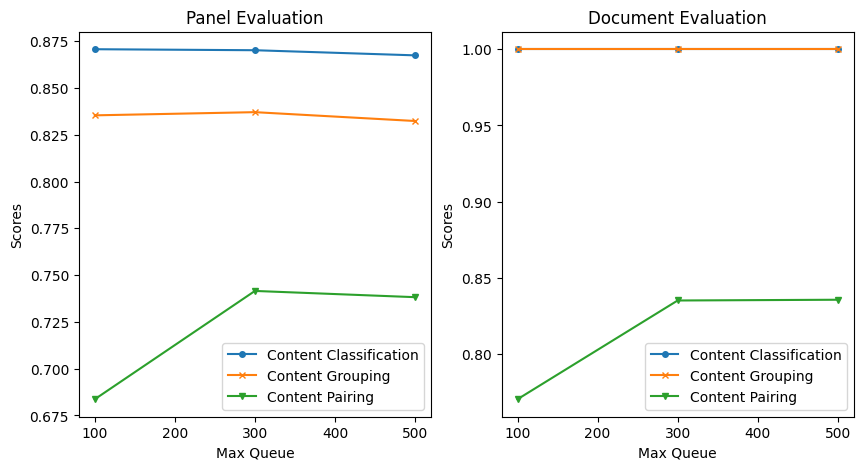

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plot(ax[0], panel_eval.copy(), 'max_queuesize', min_area=0.01, min_keypoints=20, rank_top_k=400)
ax[0].set_xlabel("Max Queue"); ax[0].set_ylabel("Scores"); ax[0].set_title("Panel Evaluation")
plot(ax[1], document_eval.copy(), 'max_queuesize', min_area=0.01, min_keypoints=20, rank_top_k=400)
ax[1].set_xlabel("Max Queue"); ax[1].set_ylabel("Scores"); ax[1].set_title("Document Evaluation")

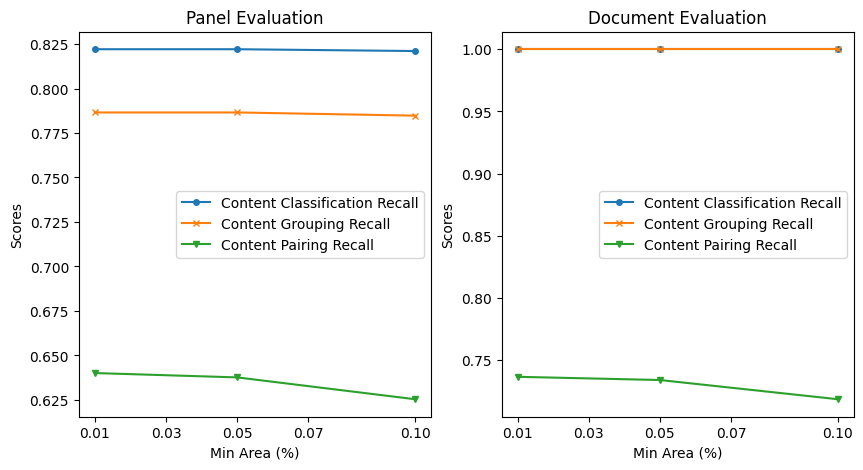

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plot(ax[0], panel_eval.copy(), 'min_area', max_queuesize=300, min_keypoints=20, rank_top_k=400)
ax[0].set_xlabel("Min Area (%)"); ax[0].set_ylabel("Scores"); ax[0].set_title("Panel Evaluation")
ax[0].set_xticks([0.01, 0.03, 0.05, 0.07, 0.1])
plot(ax[1], document_eval.copy(), 'min_area', max_queuesize=300, min_keypoints=20, rank_top_k=400)
ax[1].set_xlabel("Min Area (%)"); ax[1].set_ylabel("Scores"); ax[1].set_title("Document Evaluation")
ax[1].set_xticks([0.01, 0.03, 0.05, 0.07, 0.1])

Text(0.5, 1.0, 'Document Evaluation')

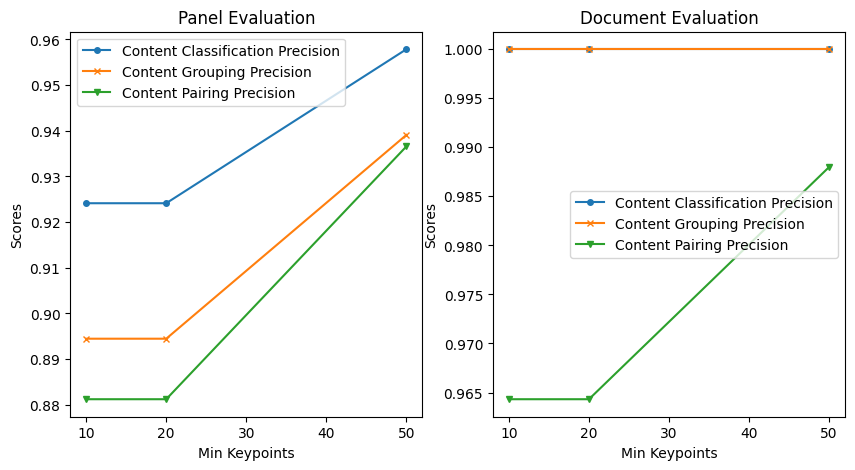

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plot(ax[0], panel_eval.copy(), 'min_keypoints', max_queuesize=300,  min_area=0.01, rank_top_k=400)
ax[0].set_xlabel("Min Keypoints"); ax[0].set_ylabel("Scores"); ax[0].set_title("Panel Evaluation")
plot(ax[1], document_eval.copy(), 'min_keypoints', max_queuesize=300, min_area=0.01, rank_top_k=400)
ax[1].set_xlabel("Min Keypoints"); ax[1].set_ylabel("Scores"); ax[1].set_title("Document Evaluation")


In [28]:
min_k_10[["alignment","min_area","min_keypoints","relationship_quality"]]

,alignment,min_area,min_keypoints,relationship_quality
190,CV_MAGSAC,0.01,10,0.835205
45,CV_MAGSAC,0.05,10,0.833530
54,CV_MAGSAC,0.10,10,0.823237


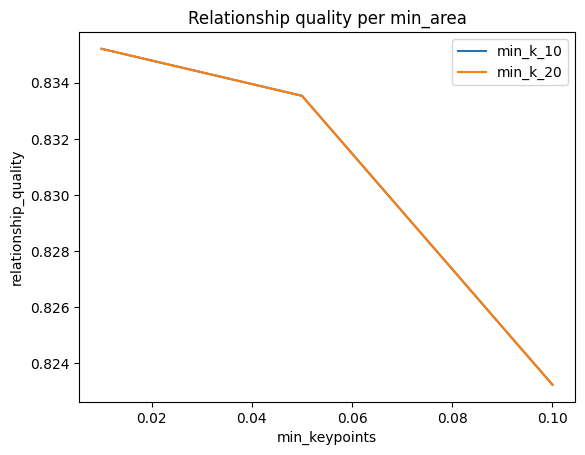

In [30]:
# check only max_quesize = 100 and min_area = 0.5
   #].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)[["alignment","desc","matching","max_queuesize","min_area","min_keypoints","rank_top_k","same_class","global_quality","grouping_quality","relationship_quality"]]

min_k_5 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.max_queuesize == 300) & (document_eval.rank_top_k == 400)  & (document_eval.min_keypoints == 5)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)
min_k_10 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.max_queuesize == 300) & (document_eval.rank_top_k == 400)  & (document_eval.min_keypoints == 10)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)
min_k_20 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.max_queuesize == 300) & (document_eval.rank_top_k == 400)  & (document_eval.min_keypoints == 20)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)
min_k_50 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.max_queuesize == 300) & (document_eval.rank_top_k == 400)  & (document_eval.min_keypoints == 50)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)	
min_k_100 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.max_queuesize == 300) & (document_eval.rank_top_k == 400)  & (document_eval.min_keypoints == 100)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)

# plot Relationship quality per min_keypoints
# plt.plot(min_k_5.min_keypoints, min_k_5.relationship_quality, label='min_k_5')
plt.plot(min_k_10.min_area, min_k_10.relationship_quality, label='min_k_10')
plt.plot(min_k_20.min_area, min_k_20.relationship_quality, label='min_k_20')
# plt.plot(min_k_50.min_keypoints, min_k_50.relationship_quality, label='min_k_50')
# plt.plot(min_k_100.min_keypoints, min_k_100.relationship_quality, label='min_k_100')
plt.legend()
plt.xlabel('min_keypoints')
plt.ylabel('relationship_quality')
plt.title('Relationship quality per min_area')
plt.show()

         

In [51]:
min_k_5

,relationship_precision,relationship_recall,relationship_quality,grouping_precision,grouping_recall,grouping_quality,global_precision,global_recall,global_quality,desc,matching,alignment,rank_top_k,min_keypoints,max_queuesize,min_area,same_class
61,0.964318,0.736583,0.835205,1.0,1.0,1.0,1.0,1.0,1.0,vlfeat_sift_heq,BF,CV_MAGSAC,400,20,300,0.01,True
190,0.964318,0.736583,0.835205,1.0,1.0,1.0,1.0,1.0,1.0,vlfeat_sift_heq,BF,CV_MAGSAC,400,10,300,0.01,True
103,0.965734,0.728092,0.830242,1.0,1.0,1.0,1.0,1.0,1.0,vlfeat_sift_heq,BF,CV_MAGSAC,200,10,300,0.01,True
176,0.965734,0.728092,0.830242,1.0,1.0,1.0,1.0,1.0,1.0,vlfeat_sift_heq,BF,CV_MAGSAC,200,20,300,0.01,True
95,0.963625,0.649264,0.775809,1.0,1.0,1.0,1.0,1.0,1.0,vlfeat_sift_heq,BF,CV_MAGSAC,40,20,300,0.01,True
183,0.963625,0.649264,0.775809,1.0,1.0,1.0,1.0,1.0,1.0,vlfeat_sift_heq,BF,CV_MAGSAC,40,10,300,0.01,True


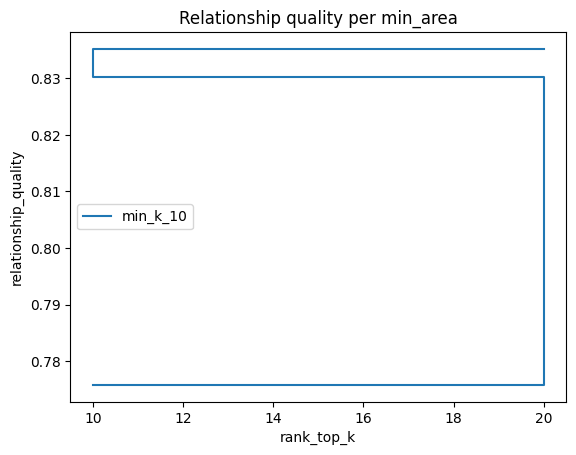

In [53]:
# check only max_quesize = 100 and min_area = 0.5
   #].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)[["alignment","desc","matching","max_queuesize","min_area","min_keypoints","rank_top_k","same_class","global_quality","grouping_quality","relationship_quality"]]

min_k_10 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.max_queuesize == 300) & (document_eval.min_area == 0.01)  ].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)

# plot Relationship quality per min_keypoints
# plt.plot(min_k_5.min_keypoints, min_k_5.relationship_quality, label='min_k_5')
plt.plot(min_k_10.min_keypoints, min_k_10.relationship_quality, label='min_k_10')
# plt.plot(min_k_50.min_keypoints, min_k_50.relationship_quality, label='min_k_50')
# plt.plot(min_k_100.min_keypoints, min_k_100.relationship_quality, label='min_k_100')
plt.legend()
plt.xlabel('rank_top_k')
plt.ylabel('relationship_quality')
plt.title('Relationship quality per min_area')
plt.show()


In [45]:
 document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.rank_top_k == 400) & (document_eval.min_area == 0.01)  & (document_eval.min_keypoints == 20)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)

,relationship_precision,relationship_recall,relationship_quality,grouping_precision,grouping_recall,grouping_quality,global_precision,global_recall,global_quality,desc,matching,alignment,rank_top_k,min_keypoints,max_queuesize,min_area,same_class
61,0.964318,0.736583,0.835205,1.0,1.0,1.0,1.0,1.0,1.0,vlfeat_sift_heq,BF,CV_MAGSAC,400,20,300,0.01,True


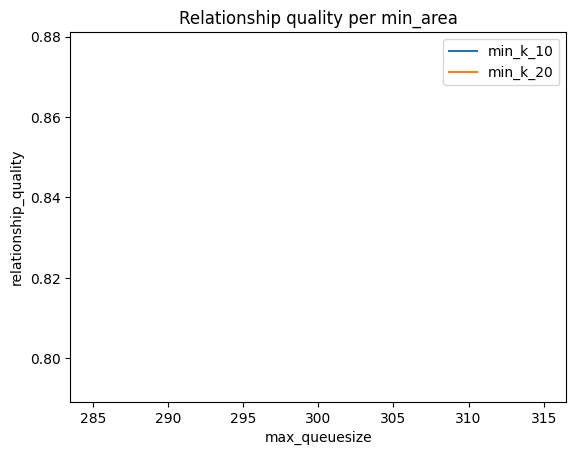

In [48]:
# check only max_quesize = 100 and min_area = 0.5
   #].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)[["alignment","desc","matching","max_queuesize","min_area","min_keypoints","rank_top_k","same_class","global_quality","grouping_quality","relationship_quality"]]

min_k_5 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.rank_top_k == 400) & (document_eval.min_area == 0.01)  & (document_eval.min_keypoints == 5)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)
min_k_10 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.rank_top_k == 400) & (document_eval.min_area == 0.01)  & (document_eval.min_keypoints == 10)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)
min_k_20 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.rank_top_k == 400) & (document_eval.min_area == 0.01)  & (document_eval.min_keypoints == 20)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)
min_k_50 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.rank_top_k == 400) & (document_eval.min_area == 0.01)  & (document_eval.min_keypoints == 50)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)	
min_k_100 = document_eval[(document_eval.desc == 'vlfeat_sift_heq') & (document_eval.alignment == 'CV_MAGSAC') & (document_eval.rank_top_k == 400) & (document_eval.min_area == 0.01)  & (document_eval.min_keypoints == 100)].sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)

# plot Relationship quality per min_keypoints
# plt.plot(min_k_5.max_queuesize, min_k_5.relationship_quality, label='min_k_5')
plt.plot(min_k_10.max_queuesize, min_k_10.relationship_quality, label='min_k_10')
plt.plot(min_k_20.max_queuesize, min_k_20.relationship_quality, label='min_k_20')
# plt.plot(min_k_50.max_queuesize, min_k_50.relationship_quality, label='min_k_50')
# plt.plot(min_k_100.max_queuesize, min_k_100.relationship_quality, label='min_k_100')
plt.legend()
plt.xlabel('max_queuesize')
plt.ylabel('relationship_quality')
plt.title('Relationship quality per min_area')
plt.show()


In [4]:
document_eval.sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)[["alignment","desc","matching","max_queuesize","min_area","min_keypoints","rank_top_k","same_class","global_quality","grouping_quality","relationship_quality"]].to_csv('docEvaluation_sorted.csv')

In [5]:
print(document_eval.sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)[["alignment","desc","matching","max_queuesize","min_area","min_keypoints","rank_top_k","same_class","global_quality","grouping_quality","relationship_quality"]].head(10).to_markdown())

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

## Panel-level evaluation

In [ ]:
panel_eval =  pd.read_csv('panelEvaluation2023-06-16_14-00-44.csv').drop(columns=['Unnamed: 0'])
panel_group_class = pd.read_csv('panelGroupEvaluation2023-06-16_14-00-44.csv').drop(columns=['Unnamed: 0'])
panel_rel_class = pd.read_csv('panelRelationshipEval2023-06-16_14-00-44.csv').drop(columns=['Unnamed: 0'])

In [ ]:
panel_eval.sort_values(by=['global_quality', 'grouping_quality','relationship_quality'], ascending=False)[["alignment","desc","matching","max_queuesize","min_area","min_keypoints","rank_top_k","same_class","global_quality","grouping_quality","relationship_quality"]].head(10)

,alignment,desc,matching,max_queuesize,min_area,min_keypoints,rank_top_k,same_class,global_quality,grouping_quality,relationship_quality
24,CV_RHO,sila,BF,300,0.05,20,100,True,0.879518,0.846067,0.722556
74,CV_RHO,sila,BF,500,0.05,10,100,True,0.879518,0.846067,0.722556
150,CV_RHO,sila,BF,300,0.05,10,100,True,0.879518,0.846067,0.722556
156,CV_RHO,sila,BF,1000,0.05,20,100,True,0.879518,0.846067,0.722556
188,CV_RHO,sila,BF,1000,0.05,10,100,True,0.879518,0.846067,0.722556
199,CV_RHO,sila,BF,500,0.05,20,100,True,0.879518,0.846067,0.722556
32,CV_LMEDS,sila,BF,300,0.05,20,100,True,0.878606,0.844381,0.725957
84,CV_LMEDS,sila,BF,500,0.05,10,100,True,0.878606,0.844381,0.725957
109,CV_LMEDS,sila,BF,300,0.05,10,100,True,0.878606,0.844381,0.725957
138,CV_LMEDS,sila,BF,1000,0.05,10,100,True,0.878606,0.844381,0.725957


In [ ]:
panel_group_class.sort_values(by=['Blots', 'Flow Cytometry','Microscopy'], ascending=False).head(10)

,Microscopy,Flow Cytometry,Blots,desc,matching,alignment,rank_top_k,min_keypoints,max_queuesize,min_area,same_class
29,0.806334,0.764386,0.305381,sila,BF,CV_LMEDS,200,10,500,0.05,True
113,0.806334,0.764386,0.305381,sila,BF,CV_LMEDS,200,20,500,0.05,True
120,0.806334,0.764386,0.305381,sila,BF,CV_LMEDS,200,20,1000,0.05,True
167,0.806334,0.764386,0.305381,sila,BF,CV_LMEDS,200,10,1000,0.05,True
78,0.806270,0.764386,0.305381,sila,BF,CV_LMEDS,200,20,300,0.05,True
168,0.806270,0.764386,0.305381,sila,BF,CV_LMEDS,200,10,300,0.05,True
32,0.789027,0.764386,0.305381,sila,BF,CV_LMEDS,100,20,300,0.05,True
84,0.789027,0.764386,0.305381,sila,BF,CV_LMEDS,100,10,500,0.05,True
109,0.789027,0.764386,0.305381,sila,BF,CV_LMEDS,100,10,300,0.05,True
138,0.789027,0.764386,0.305381,sila,BF,CV_LMEDS,100,10,1000,0.05,True


In [ ]:
panel_rel_class.sort_values(by=['Blots', 'Flow Cytometry','Microscopy'], ascending=False).head(10)

,Microscopy,Flow Cytometry,Blots,desc,matching,alignment,rank_top_k,min_keypoints,max_queuesize,min_area,same_class
29,0.806334,0.764386,0.305381,sila,BF,CV_LMEDS,200,10,500,0.05,True
113,0.806334,0.764386,0.305381,sila,BF,CV_LMEDS,200,20,500,0.05,True
120,0.806334,0.764386,0.305381,sila,BF,CV_LMEDS,200,20,1000,0.05,True
167,0.806334,0.764386,0.305381,sila,BF,CV_LMEDS,200,10,1000,0.05,True
78,0.806270,0.764386,0.305381,sila,BF,CV_LMEDS,200,20,300,0.05,True
168,0.806270,0.764386,0.305381,sila,BF,CV_LMEDS,200,10,300,0.05,True
32,0.789027,0.764386,0.305381,sila,BF,CV_LMEDS,100,20,300,0.05,True
84,0.789027,0.764386,0.305381,sila,BF,CV_LMEDS,100,10,500,0.05,True
109,0.789027,0.764386,0.305381,sila,BF,CV_LMEDS,100,10,300,0.05,True
138,0.789027,0.764386,0.305381,sila,BF,CV_LMEDS,100,10,1000,0.05,True
